In [28]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

env: KERAS_BACKEND=tensorflow


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split


from tensorflow.python.keras import layers, Sequential
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras import regularizers,callbacks,initializers
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.optimizers import SGD, Adam ,RMSprop
from tensorflow.python.keras.models import Sequential, Model, load_model


ModuleNotFoundError: ignored

In [0]:
path='/content/drive/My Drive/Colab Notebooks/TueLearning/'
df = pd.read_excel(os.path.join(path,'copy_NCKU_Hypotension.xls'))

In [32]:
df_train = shuffle(np.array(df))
df_train

array([[ 62., 105.,  68., ..., 100.,   4.,   1.],
       [ 49.,  98.,  64., ..., 100.,   4.,   1.],
       [ 49., 126.,  82., ..., 100.,   4.,   0.],
       ...,
       [ 62., 144.,  83., ..., 100.,   2.,   0.],
       [ 50., 134.,  69., ..., 100.,   0.,   0.],
       [ 44., 158.,  74., ..., 100.,   0.,   0.]])

In [0]:
x = df_train[:, :14]
y = df_train[:, 14]

x = preprocessing.scale(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train.shape

(10656,)

In [35]:
y_train_onehot = pd.get_dummies(y_train)
y_test_onehot = pd.get_dummies(y_test)
print(y_train_onehot)
y_train_onehot.shape

       0.0  1.0
0        0    1
1        1    0
2        0    1
3        1    0
4        0    1
...    ...  ...
10651    0    1
10652    1    0
10653    1    0
10654    1    0
10655    0    1

[10656 rows x 2 columns]


(10656, 2)

In [36]:
x_train_reshape = np.reshape(x_train, (len(x_train), len(x_train[0]),1))
x_test_reshape = np.reshape(x_test, (len(x_test), len(x_test[0]),1))
print(" x_train_reshape\n",x_train_reshape.shape,"\n")
print(" x_test_reshape\n",x_test_reshape.shape)


 x_train_reshape
 (10656, 14, 1) 

 x_test_reshape
 (2664, 14, 1)


In [86]:
num_classes = 2
epoch =30
learning_rate = 1e-3
hidden_units = 200 
batch_size = 32
input_shape = x_train_reshape.shape[1:]
optim = Adam(
    lr = learning_rate)
print(input_shape)

(14, 1)


In [0]:
##LSTM model

def LSTM_model():
  model = Sequential(name='LSTM')
  model.add(LSTM(hidden_units,
                 input_shape = input_shape))
  model.add(Dense(num_classes))
  model.add(layers.Activation('softmax'))

  return model



In [119]:

LSTM_layer = [LSTM(hidden_units,input_shape = input_shape),
              Dense(num_classes),
              layers.Activation('softmax'),
              ]
GRU_layer = [layers.GRU(hidden_units,
                        input_shape = input_shape),
                Dense(num_classes),
                layers.Activation('softmax')
            ]

model = Sequential(LSTM_layer)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
print("-----------------------\n\n超參數設置:\n\n","種類:",
      num_classes,"種","\n 學習率:",learning_rate,"\n 輸入形狀:",
      input_shape,"\n batch_size:",batch_size,"\n Epoch:",epoch,"\n\n")
print('optimizer: ',str(optim))
print("\n-----------------------\n")
model.summary()

-----------------------

超參數設置:

 種類: 2 種 
 學習率: 0.001 
 輸入形狀: (14, 1) 
 batch_size: 32 
 Epoch: 30 


optimizer:  <tensorflow.python.keras.optimizers.Adam object at 0x7f2ca404fa20>

-----------------------

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 402       
_________________________________________________________________
activation_18 (Activation)   (None, 2)                 0         
Total params: 162,002
Trainable params: 162,002
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(x_train_reshape, y_train_onehot,
                    epochs = epoch,
                    batch_size = batch_size,
                    validation_split = 0.1,
                    )

Epoch 1/30
300/300 [==============================] - 1s 5ms/step - loss: 0.5791 - accuracy: 0.7010 - val_loss: 0.5282 - val_accuracy: 0.7439
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5496 - accuracy: 0.7263 - val_loss: 0.5313 - val_accuracy: 0.7420
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5399 - accuracy: 0.7341 - val_loss: 0.5312 - val_accuracy: 0.7458
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5324 - accuracy: 0.7403 - val_loss: 0.5011 - val_accuracy: 0.7749
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5165 - accuracy: 0.7502 - val_loss: 0.4969 - val_accuracy: 0.7627
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.4923 - accuracy: 0.7656 - val_loss: 0.4653 - val_accuracy: 0.7917
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.4714 - accuracy: 0.7808 - val_loss: 0.4222 - val_accuracy: 0.8114
Epoch 

In [104]:
# 用模型對測試級做分類
pred =  model.predict(x_test_reshape)

# 將分類轉回原格式
y_pred = np.argmax(pred,axis=1)

# 
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print("在",len(y_test),"的數據量上做測試\n")
print("混淆矩陣\n",confusion_matrix(y_test, y_pred))

在 2664 的數據量上做測試

混淆矩陣
 [[1083  251]
 [ 242 1088]]


In [105]:
# Precision
tp/(tp+fp)

0.8125466766243465

In [106]:
# Recall
tp/(tp+fn)

0.8180451127819549

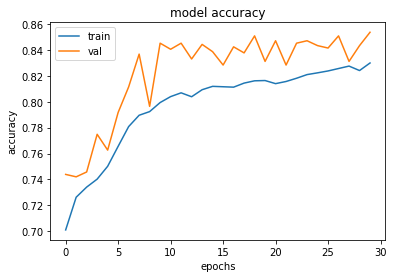

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')

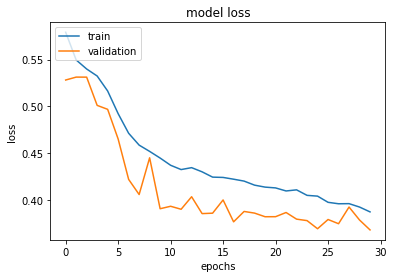

In [108]:
plt.title('model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')


In [46]:
score = model.evaluate(x_test_reshape,y_test_onehot)

84/84 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8168


In [47]:
print(x_test.shape)
print(x_train_reshape.shape)
print(x_test_reshape.shape)
print(y_test.shape)
print(y_train_onehot.shape)
print('測試資料的 loss', score[0])
print('測試資料的正確率', score[1])

(2664, 14)
(10656, 14, 1)
(2664, 14, 1)
(2664,)
(10656, 2)
測試資料的 loss 0.41640639305114746
測試資料的正確率 0.8168168067932129


In [48]:
y_predict = model.predict(x_test_reshape)
print(y_predict.shape)
print(y_predict)

(2664, 2)
[[0.769103   0.24364354]
 [0.15508884 0.86989313]
 [0.5336528  0.455148  ]
 ...
 [0.5313022  0.45589933]
 [0.59809554 0.39874622]
 [0.3021877  0.69754386]]


In [49]:
pred_inverse=[]
n=8

for thershold in range(1,n):
  for i in range (0,1332):
    u=0.1*thershold

    if y_predict[i,0]>u :
      pred_inverse.append(0)
    else :
      pred_inverse.append(1)

pred_inverse=np.reshape(pred_inverse,(n-1,1332))
#大矩陣的樣子
print(pred_inverse)
print(np.array(pred_inverse).shape)

[[0 0 0 ... 1 1 0]
 [0 1 0 ... 1 1 1]
 [0 1 0 ... 1 1 1]
 ...
 [0 1 0 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]]
(7, 1332)


In [0]:
model_LSTM_json = model.to_json()
open('NCKU_Hypotension_LSTM.json', 'w').write(model_LSTM_json)
model.save_weights('NCKU_Hypotension_LSTM.h5')

In [0]:
model.load_weights('NCKU_Hypotension_LSTM.h5')

In [127]:
output_layer = [Dense(100),
                layers.Activation('relu'),
                Dense(num_classes),
                layers.Activation('softmax')
                ]

model_new = Sequential(LSTM_layer + output_layer)
model_new.summary()



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 402       
_________________________________________________________________
activation_18 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 100)               300       
_________________________________________________________________
activation_22 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 202       
_________________________________________________________________
activation_23 (Activation)   (None, 2)               

In [0]:
for layer in LSTM_layer:
    layer.trainable = False

In [122]:
model_new.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 402       
_________________________________________________________________
activation_18 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               300       
_________________________________________________________________
activation_20 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 202       
_________________________________________________________________
activation_21 (Activation)   (None, 2)               

In [0]:
model_new.compile(loss = 'binary_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])



In [125]:
history = model.fit(x_train_reshape, y_train_onehot,
                    epochs = 10,
                    batch_size = batch_size,
                    validation_split = 0.1,
                    )

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3841 - accuracy: 0.8301 - val_loss: 0.3763 - val_accuracy: 0.8452
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3799 - accuracy: 0.8337 - val_loss: 0.3866 - val_accuracy: 0.8490
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3798 - accuracy: 0.8344 - val_loss: 0.3701 - val_accuracy: 0.8537
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3744 - accuracy: 0.8338 - val_loss: 0.3931 - val_accuracy: 0.8386
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3692 - accuracy: 0.8384 - val_loss: 0.3916 - val_accuracy: 0.8415
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3665 - accuracy: 0.8409 - val_loss: 0.3927 - val_accuracy: 0.8386
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8404 - val_loss: 0.3795 - val_accuracy: 0.8471
Epoch 

## 還要修正